In [3]:
######################################NG 따라하기##############################
#https://towardsdatascience.com/populating-a-network-graph-with-named-entities-fb8e3d2a380f
import pandas as pd
import numpy
import pickle
from operator import itemgetter
from fuzzywuzzy import process,fuzz
import spacy
import en_core_web_sm
%matplotlib inline
from matplotlib.pyplot import figure
import networkx as nx

In [6]:
with open('npr_coronavirus.txt','rb') as fp:
    corpus = pickle.load(fp)
print(corpus[1])

North Carolina Reports Highest One Day Spike Of COVID-19 Cases

Enlarge this image toggle caption Gerry Broome/AP Gerry Broome/AP

North Carolina has reported its highest one-day spike in new COVID-19 cases, a development that comes a day after the state entered its second phase of re-opening.

In a statement Saturday, the state's Department of Health and Human Services reported 1,107 infections – around 250 more cases than the state's last highest daily tally.

"This is a notable and concerning increase," said the department's secretary, Mandy Cohen. "As we head into a holiday weekend, please practice the three Ws – wear a face covering, wait six feet apart, and wash your hands frequently. When it comes to our health, we need to work together to protect our families, friends and neighbors."

The spike in new cases underscores the challenge that states across the country are facing as they weigh when to ease restrictions designed to stem the spread of the coronavirus outbreak.

North C

In [19]:
nlp = en_core_web_sm.load()

entities = []

for article in corpus[:50]:
    tokens = nlp(''.join(article))
    gpe_list = []
    for ent in tokens.ents:
        ##ent.label_ 에는 해당 ent 가 어느 카테고리인지 저장하고 있습니다.
        if ent.label_ == 'GPE':
            gpe_list.append(ent.text)
    entities.append(gpe_list)

In [20]:
articles = []

for entity_list in entities:
    cleaned_entity_list= []
    for entity in entity_list:
        cleaned_entity_list.append(entity.lstrip('the').replace("'s", "").replace("’s",""))
    articles.append(cleaned_entity_list)
print(articles)

[['U.S.'], ['North Carolina', 'North Carolina', 'North Carolina', 'North Carolina', 'U.S.', 'Los Angeles', 'Chicago', 'Washington', 'D.C.', 'North Carolina'], ['NC'], ['North Carolina', 'Phase 1', 'North Carolina', 'North Carolina', 'North Carolina', 'North Carolina', 'North Carolina', 'Hospitalizations', 'North Carolina', 'North Carolina', 'North Carolina'], ['Los Angeles', 'D.C.', 'Chicago', 'U.S.', 'Washington', 'D.C.', 'Chicago', 'Los Angeles', 'U.S.', 'Washington', 'D.C.', 'Chicago', 'Los Angeles', 'D.C.', 'LA', 'Chicago', 'Chicago', 'Illinois', 'Illinois', 'Chicago', 'Chicago', 'Chicago', 'Chicago', 'Seattle', 'California', 'New York', 'Chicago', 'D.C.', 'D.C.', 'D.C.', 'D.C.', 'D.C.', 'Virginia', 'Maryland', 'Virginia', 'Maryland', 'D.C.', 'Prince George County', 'Md.', 'D.C.', 'OG County', 'D.C.', 'Los Angeles', 'California', 'California', 'LA County', 'California', 'LA County', 'California', 'Los Angeles', 'LA', 'Angelenos', 'Los Angeles', 'Washington', 'Chicago'], ['Washingto

In [22]:
## FuzzyWuzzy
choices = set([item for sublist in articles for item in sublist])

cleaned_articles = []
for article in articles:
    article_entities = []
    for entity in set(article):
        article_entities.append(process.extractOne(entity, choices)[0])
    cleaned_articles.append(article_entities)

In [23]:
articles = [ article for article in cleaned_articles if article != []]

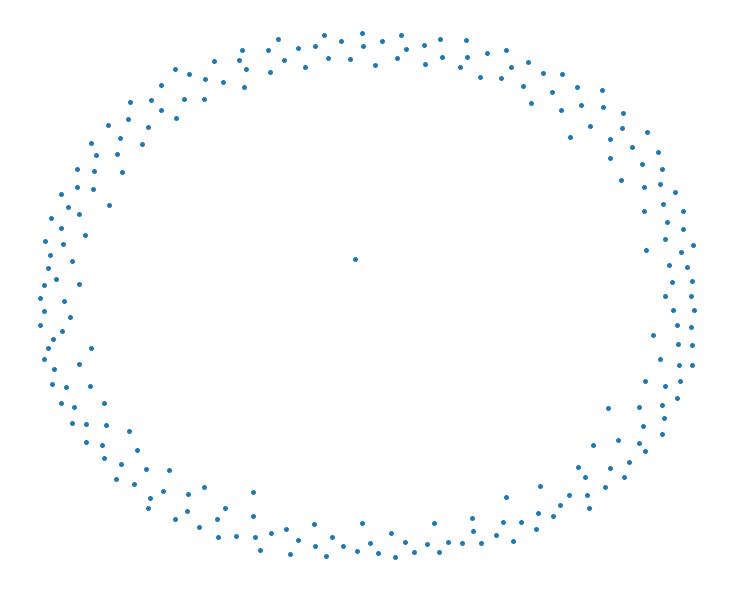

In [24]:
#####그래프 그리기
G =nx.Graph()
for entities in articles:
    G.add_nodes_from(entities)
figure(figsize=(10,8))
nx.draw(G,node_size=15)

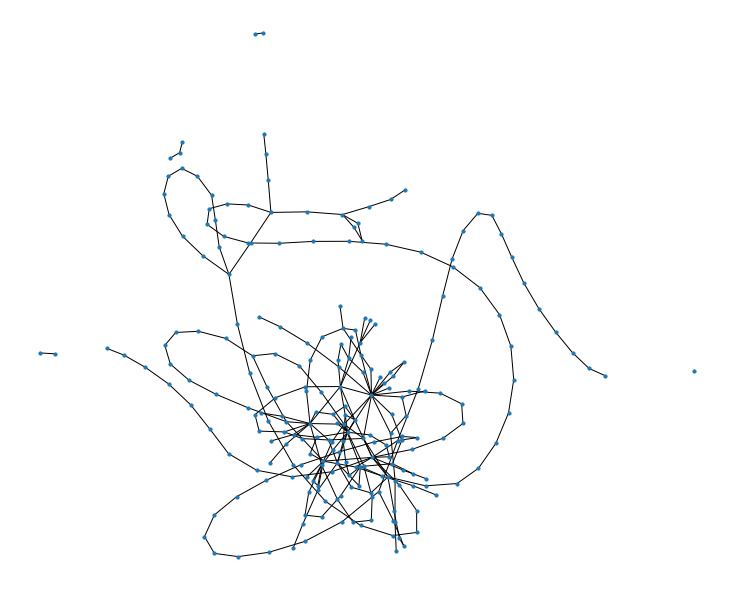

In [25]:
for entities in articles:
    if len(entities) > 1:
        for i in range(len(entities)-1):
           G.add_edges_from([(str(entities[i]),str(entities[i+1]))])
figure(figsize=(10, 8))
nx.draw(G, node_size=10)

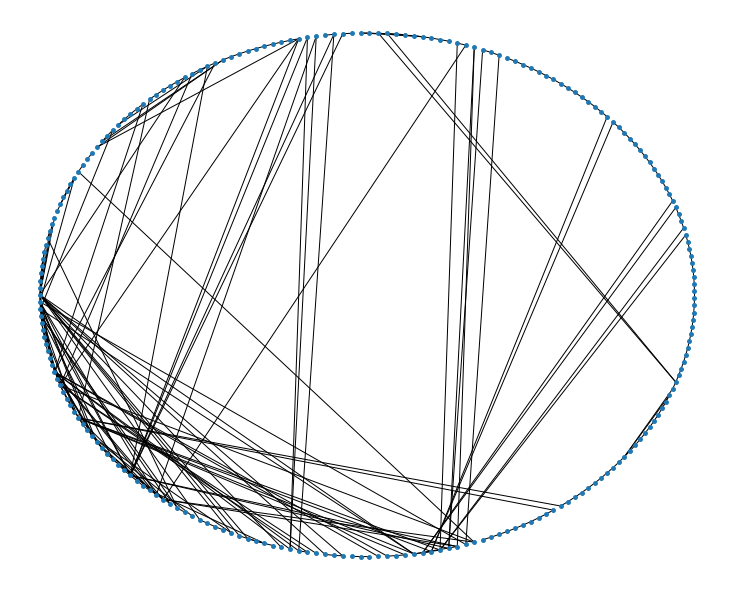

In [26]:
figure(figsize=(10, 8))
nx.draw_shell(G, node_size=15)

In [27]:
G.degree

DegreeView({'U.S.': 17, 'Washington': 8, 'Chicago': 7, 'D.C.': 7, 'North Carolina': 3, 'Los Angeles': 4, 'NC': 0, 'Phase 1': 2, 'Hospitalizations': 1, 'Maryland': 2, 'Md.': 2, 'California': 12, 'LA': 2, 'Illinois': 9, 'Prince George County': 2, 'LA County': 2, 'Angelenos': 2, 'OG County': 2, 'New York': 11, 'Virginia': 2, 'Seattle': 1, 'Miami': 4, 'Florida': 4, 'N.J.': 4, 'West Palm Beach': 2, 'Bedminster': 4, ' United States of America': 1, ' Islamic Republic of Iran': 2, ' United States': 11, 'People Republic of China': 4, 'Hubei Province': 2, 'Wuhan': 2, 'Texas': 5, 'New Jersey': 6, 'Kennebunkport': 2, 'Massachusetts': 3, 'Maine': 1, 'D-N.Y.': 1, 'Alaska': 2, 'Ireland': 2, 'France': 2, 'Biarritz': 1, 'Canada': 2, 'Japan': 2, 'China': 4, 'France Germany': 2, 'Italy': 4, 'Britain': 1, ' United States Golf Association': 1, 'Iowa': 3, 'Minnesota': 3, 'Davenport': 2, 'Chino Hills': 1, 'America': 2, 'Hollywood': 2, 'Fauci': 2, 'lesbian': 1, 'gay': 2, 'S.J.': 1, 'YouTube': 1, 'Zoom': 2, 'C

In [28]:
nx.write_gexf(G, "npr_coronavirus_GPE_50.gexf")